In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drct = '/home/somayeh/Documents/Career/Data_Incubator/Project/'
filename1 = 'application.tsv'
filename2 = 'cpc_current.tsv'
filename3 = 'uspatentcitation.tsv'


In [ ]:
df_chunk = pd.read_csv(drct+filename3,sep='\t',header=0, chunksize=1000000)
patent_list = []  
for cnt, chunk in enumerate(df_chunk):
    print(cnt)
    chunk['year'] = pd.to_datetime(chunk['date'], format = '%Y-%M-%d', errors='coerce').dt.year
    chunk = chunk[(chunk.year>2000)&(chunk.year<2020)]
#     chunk.drop(['uuid', 'date', 'name', 'kind','country','category','sequence'], axis=1)
    patent_list.append(chunk[['patent_id','citation_id','year']])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


In [ ]:
df = pd.concat(patent_list)

In [ ]:
#10 most cited patents for the time interval
citations = df.patent_id

appearances = defaultdict(int)
for curr in citations:
    appearances[curr] += 1

appearances    

In [ ]:
from heapq import nlargest

largest = nlargest(5, appearances, key=appearances.get)
largest

In [ ]:
yr_ci=[]
for n in range(5):
    for yr in range(2001,2020):
        citations_df = df.loc[(df['year']==yr) &(df['patent_id']==largest[n])]
        citations = citations_df.citation_id
        yr_ci.append(len(citations))
        plt.plot(yr_ci,'o')
plt.xlabel('year')
plt.ylabel('# of citations')

In [5]:
#most cited patents for each year
from collections import defaultdict

def keywithmaxval(d):
    v=list(d.values()) 
    k=list(d.keys())
    return(k[v.index(max(v))], v[v.index(max(v))])
K= []
V= []
for cnt,yr in enumerate(range(2001,2020)):
    citations_df = df.loc[(df['year']==yr)]
    citations = citations_df.citation_id

    appearances = defaultdict(int)
    for curr in citations:
        appearances[curr] += 1
    k,v = keywithmaxval(appearances)    
    K.append(k)
    V.append(v)

(['6294274',
  '6433261',
  '6563174',
  '6727522',
  '6850252',
  '7061014',
  '7297977',
  '7402506',
  '7501293',
  '7674650',
  '8053184',
  '8095413',
  '8479122',
  '8708213',
  '8992422',
  '9226751',
  '9537354',
  '9866279',
  '10168525'],
 [2671,
  1293,
  2604,
  2630,
  1434,
  2674,
  2648,
  2610,
  2604,
  2718,
  920,
  720,
  706,
  417,
  349,
  229,
  136,
  58,
  2])

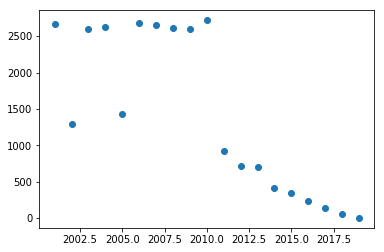

In [6]:
plt.plot((range(2001,2020)),V,'o')
K,V

In [7]:
k= K[10]

cnt = []
for yr in range(2001,2020):
    citations = df.loc[(df['citation_id']==k)]
    cnt.append(len(citations))
    
cnt    

[920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920,
 920]

In [9]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

A = list(df.patent_id)
B = list(df.citation_id)


MemoryError: 

In [17]:
from collections import defaultdict

appearances = defaultdict(int)
for curr in citation_id:
    appearances[curr] += 1
    

In [18]:
len(appearances), len(set(citation_id))

(4793566, 4793566)

(array([2.04894e+06, 9.23989e+05, 5.24833e+05, 3.27725e+05, 2.18155e+05,
        1.50772e+05, 1.08922e+05, 8.08580e+04, 6.17450e+04, 4.80740e+04,
        3.87190e+04, 3.10520e+04, 2.61390e+04, 2.16750e+04, 1.82740e+04,
        1.57720e+04, 1.36520e+04, 1.18210e+04, 1.05280e+04, 9.22100e+03,
        8.10600e+03, 7.39200e+03, 6.49600e+03, 5.81900e+03, 5.22600e+03,
        4.88900e+03, 4.33900e+03, 4.06400e+03, 3.57100e+03, 3.32800e+03,
        3.03700e+03, 2.78000e+03, 2.55200e+03, 2.38300e+03, 2.15400e+03,
        2.03100e+03, 1.80000e+03, 1.72600e+03, 1.60100e+03, 1.44800e+03,
        1.28700e+03, 1.25200e+03, 1.13000e+03, 1.18900e+03, 1.06100e+03,
        1.02400e+03, 9.36000e+02, 8.35000e+02, 8.08000e+02, 0.00000e+00,
        7.12000e+02, 7.16000e+02, 6.84000e+02, 6.17000e+02, 6.56000e+02,
        5.75000e+02, 5.69000e+02, 5.27000e+02, 5.30000e+02, 4.46000e+02,
        4.45000e+02, 4.28000e+02, 3.98000e+02, 3.99000e+02, 3.75000e+02,
        3.36000e+02, 3.31000e+02, 3.15000e+02, 3.21

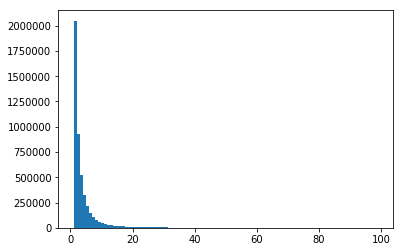

In [19]:
values = ([value for key, value in appearances.items() if value < 100])
plt.hist(values,100)

In [20]:
df_concat['date']

0           1989-10-01
1           2006-04-01
2           1934-06-01
3           2007-04-01
4           2003-11-01
5           2008-06-01
6           1961-06-01
7           1993-09-01
8           1990-01-01
9           2012-05-01
10          2001-11-01
11          2001-01-01
12          1981-04-01
13          1994-08-01
14          1989-01-01
15          2000-01-01
16          2001-06-01
17          1973-07-01
18          2003-08-01
19          1987-09-01
20          1988-02-01
21          1993-07-01
22          2007-09-01
23          1999-03-01
24          1991-12-01
25          2003-02-01
26          1966-08-01
27          2015-03-01
28          1982-11-01
29          1982-07-01
               ...    
85999970    2001-11-01
85999971    1989-05-01
85999972    2006-12-01
85999973    1973-06-01
85999974    1998-01-01
85999975    1982-08-01
85999976    1997-08-01
85999977    2007-05-01
85999978    2003-05-01
85999979    1968-08-01
85999980    1924-07-01
85999981    2008-04-01
85999982   

In [15]:
df_concat['year'] = pd.to_datetime(df_concat['date'], format = '%Y-%M-%d', errors='coerce').dt.year
df_concat.drop('date', axis =1)
# plt.hist(df_concat[df_concat['date'].dt.year>1990],20)

,patent_id,citation_id,sequence,year
0,5354551,4875247,11,1989.0
1,D674253,D519335,13,2006.0
2,D809697,1963218,0,1934.0
3,D808172,7207426,14,2007.0
4,8683318,6642945,6,2003.0
5,8250307,7386701,54,2008.0
6,D490798,D190749,1,1961.0
7,9199394,5242647,12,1993.0
8,7398575,4894880,3,1990.0
9,D677391,D659549,26,2012.0


(array([3.78568e+05, 0.00000e+00, 0.00000e+00, 4.00560e+05, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.24448e+05, 0.00000e+00, 0.00000e+00,
        4.73598e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.91162e+05,
        0.00000e+00, 0.00000e+00, 5.56946e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 5.77302e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.90165e+05, 0.00000e+00, 0.00000e+00, 7.89684e+05, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 7.99570e+05, 0.00000e+00, 0.00000e+00,
        7.90611e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.10177e+05,
        0.00000e+00, 0.00000e+00, 6.80011e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 5.80277e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.41787e+05, 0.00000e+00, 0.00000e+00, 5.02102e+05, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.09201e+05, 0.00000e+00, 0.00000e+00,
        3.53510e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.23187e+05,
        0.00000e+00, 0.00000e+00, 3.60088e+05, 0.00

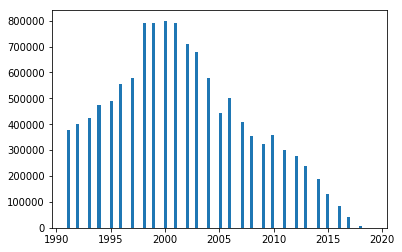

In [16]:
plt.hist(df_concat.year[(df_concat.year>1990)&(df_concat.year<2020)],100)